## Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.segmentation import disk_level_set
import os
from PIL import Image

## Paths

In [2]:
IMG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_image/'
SEG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_segmentation/'

TRUTH = 'fyp2021p3g03/data/example_ground_truth.csv'
FEATURES = 'fyp2021p3g03/features/features.csv'

## Import single image and create mask

In [4]:
image = plt.imread(SEG_PATH+'ISIC_0001769_segmentation.png')

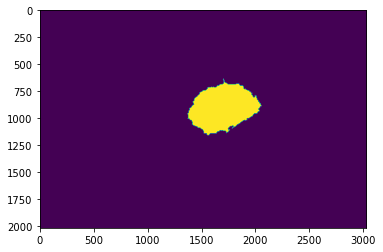

In [85]:
plt.imshow(image)

In [146]:
def get_boundaries(image):
    mask = np.where(image == 1)
    left = min(mask[1])
    right = max(mask[1])
    upper = min(mask[0])
    lower = max(mask[0])
    return upper, lower, left, right

def get_center(image): # NOT NEEDED ANYMORE ?
    up, dw, lt, rt = get_boundaries(image)
    center = ((up+dw)/2, (lt+rt)/2)
    return center
    
def zoom(image):
    up, dw, lt, rt = get_boundaries(image)
    rectangle = image[up:dw+1, lt:rt+1]
    return rectangle

def cuts(image):

    center_h = image.shape[0] // 2
    if image.shape[0] % 2 == 0:
        upside = image[:center_h,:]
        downside = image[center_h:,:]
    else:
        upside = image[:center_h+1,:]
        downside = image[center_h:,:]
        
    center_w = image.shape[1] // 2    
    if image.shape[1] % 2 == 0:
        leftside = image[:,:center_w]
        rightside = image[:,center_w:]
    else:
        leftside = image[:,:center_w+1]
        rightside = image[:,center_w:]
 
    return upside, downside, leftside, rightside


def test_symmetry(image, show=False):

    symmetries = []
    
    for deg in range(0,90, 30):
        rot_image = skimage.transform.rotate(image, deg)
        z = zoom(rot_image)
        
        upside, downside, leftside, rightside = cuts(z)

        up_dw = np.sum(np.bitwise_and(upside.astype(int), np.flipud(downside).astype(int))) /\
        np.sum(np.bitwise_or(upside.astype(int), np.flipud(downside).astype(int)))

        lt_rt = np.sum(np.bitwise_and(leftside.astype(int), np.fliplr(rightside).astype(int))) /\
        np.sum(np.bitwise_or(leftside.astype(int), np.fliplr(rightside).astype(int)))
    
        symmetries.append((up_dw+lt_rt)/2)
    
    symmetry = max(symmetries)

    return symmetry
    
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def get_mask(image):
    gray = rgb2gray(image)
    plt.hist(gray)

def crop(image, mask):
    img = image.copy()
    img[mask==0] = 0
    return img

def color_std(image):
    try:
        R = image[np.where(image[:,:,0] != 0) and np.where(image[:,:,1] != 0) and np.where(image[:,:,2] != 0)][:,0]
        G = image[np.where(image[:,:,0] != 0) and np.where(image[:,:,1] != 0) and np.where(image[:,:,2] != 0)][:,1]
        B = image[np.where(image[:,:,0] != 0) and np.where(image[:,:,1] != 0) and np.where(image[:,:,2] != 0)][:,2]
        #print(np.std(R), np.std(G), np.std(B))
        color_std = (np.std(R) + np.std(G) + np.std(B)) /3
    except:
        color_std = 'NA'
    return color_std

In [122]:
symmetries = {}
for f in os.listdir(SEG_PATH)[:10]:
    if f.endswith('.png'):
        image = plt.imread(SEG_PATH+f)
        symmetries[f] = test_symmetry(image)
    

In [123]:
symmetries

{'ISIC_0001769_segmentation.png': 0.7602783631655298,
 'ISIC_0001852_segmentation.png': 0.8449745698036415,
 'ISIC_0001871_segmentation.png': 0.9168436112478937,
 'ISIC_0003462_segmentation.png': 0.9252754206504514,
 'ISIC_0003539_segmentation.png': 0.7277153165857638,
 'ISIC_0003582_segmentation.png': 0.8198538836056453,
 'ISIC_0003657_segmentation.png': 0.864792539195022,
 'ISIC_0003805_segmentation.png': 0.8406930951259688,
 'ISIC_0004337_segmentation.png': 0.9205542882473023}

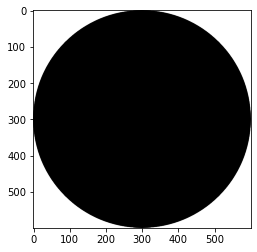

In [165]:
test = plt.imread(SEG_PATH+'test-black-circle.png')
plt.imshow(test)

In [169]:
test_symmetry(test)

1.0

In [178]:
symmetries = {}
for f in os.listdir(SEG_PATH):
    if f.endswith('.png'):
        image = plt.imread(SEG_PATH+f)
        symmetries[f] = test_symmetry(image)
    

In [179]:
symmetries

{'ISIC_0001769_segmentation.png': 0.7602783631655298,
 'ISIC_0001852_segmentation.png': 0.8449745698036415,
 'ISIC_0001871_segmentation.png': 0.9168436112478937,
 'ISIC_0003462_segmentation.png': 0.9252754206504514,
 'ISIC_0003539_segmentation.png': 0.7277153165857638,
 'ISIC_0003582_segmentation.png': 0.8198538836056453,
 'ISIC_0003657_segmentation.png': 0.864792539195022,
 'ISIC_0003805_segmentation.png': 0.8406930951259688,
 'ISIC_0004337_segmentation.png': 0.9205542882473023,
 'ISIC_0006651_segmentation.png': 0.9180263534813962,
 'ISIC_0006671_segmentation.png': 0.8696323835877813,
 'ISIC_0006815_segmentation.png': 0.7945483932515154,
 'ISIC_0006914_segmentation.png': 0.873959001338855,
 'ISIC_0007141_segmentation.png': 0.9376931340956733,
 'ISIC_0007156_segmentation.png': 0.9426058488319671,
 'ISIC_0007235_segmentation.png': 0.9296713438859887,
 'ISIC_0007241_segmentation.png': 0.8288205586947341,
 'ISIC_0007332_segmentation.png': 0.908944568896474,
 'ISIC_0007344_segmentation.png

In [184]:
with open("symmetry_results.csv", 'w') as outfile:
    for k, v in symmetries.items():
        line = str(k) + "\t" + str(v) + "\n"
        outfile.write(line)

In [9]:
# Load images as Image objects  
img = Image.open(IMG_PATH + 'ISIC_0001769.jpg') 
mask = Image.open(SEG_PATH + 'ISIC_0001769_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
mask.paste(img, mask = mask)

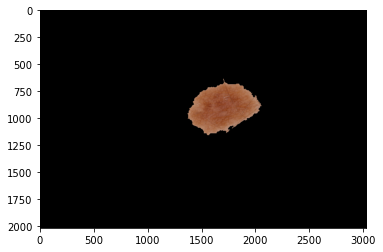

In [61]:
img = plt.imread(IMG_PATH + 'ISIC_0001769.jpg')
mask = plt.imread(SEG_PATH + 'ISIC_0001769_segmentation.png') 

img = img.copy()
img[mask==0] = 0
  
# Display 
plt.imshow(img)

In [98]:
red_mask = img[np.where(img[:,:,0] != 0) and np.where(img[:,:,1] != 0) and np.where(img[:,:,2] != 0)][:,0]
green_mask = img[np.where(img[:,:,0] != 0) and np.where(img[:,:,1] != 0) and np.where(img[:,:,2] != 0)][:,1]
blue_mask = img[np.where(img[:,:,0] != 0) and np.where(img[:,:,1] != 0) and np.where(img[:,:,2] != 0)][:,2]

In [111]:
red_std = np.std(red_mask)
green_std = np.std(green_mask)
blue_std = np.std(blue_mask)
color_std = (red_std + green_std + blue_std) / 3

In [124]:
color_std(img)

16.950563878590646

In [147]:
color_diff = {}
for f in os.listdir(IMG_PATH):
    if f.endswith('.jpg'):
        cut = f.index('.')
        name = f[:cut]
        image = plt.imread(IMG_PATH+f)
        mask = plt.imread(SEG_PATH+name+'_segmentation.png')
        image = crop(image, mask)
        print("Getting color difference for :"+f)
        color_diff[f] = color_std(image)

Getting color difference for :ISIC_0001769.jpg
Getting color difference for :ISIC_0001852.jpg
Getting color difference for :ISIC_0001871.jpg
Getting color difference for :ISIC_0003462.jpg
Getting color difference for :ISIC_0003539.jpg
Getting color difference for :ISIC_0003582.jpg
Getting color difference for :ISIC_0003657.jpg
Getting color difference for :ISIC_0003805.jpg
Getting color difference for :ISIC_0004337.jpg
Getting color difference for :ISIC_0006651.jpg
Getting color difference for :ISIC_0006671.jpg
Getting color difference for :ISIC_0006815.jpg
Getting color difference for :ISIC_0006914.jpg
Getting color difference for :ISIC_0007141.jpg
Getting color difference for :ISIC_0007156.jpg
Getting color difference for :ISIC_0007235.jpg
Getting color difference for :ISIC_0007241.jpg
Getting color difference for :ISIC_0007332.jpg
Getting color difference for :ISIC_0007344.jpg
Getting color difference for :ISIC_0007528.jpg
Getting color difference for :ISIC_0007796.jpg
Getting color

In [148]:
color_diff

{'ISIC_0001769.jpg': 16.950563878590646,
 'ISIC_0001852.jpg': 29.48429724784702,
 'ISIC_0001871.jpg': 12.901346174200162,
 'ISIC_0003462.jpg': 25.24461330285855,
 'ISIC_0003539.jpg': 29.05465372053313,
 'ISIC_0003582.jpg': 31.443984642809074,
 'ISIC_0003657.jpg': 13.836491704605146,
 'ISIC_0003805.jpg': 19.11071882041981,
 'ISIC_0004337.jpg': 16.18850579215437,
 'ISIC_0006651.jpg': 25.95434469170338,
 'ISIC_0006671.jpg': 10.060431547261901,
 'ISIC_0006815.jpg': 11.654023484955632,
 'ISIC_0006914.jpg': 16.393666542027773,
 'ISIC_0007141.jpg': 25.37939978818497,
 'ISIC_0007156.jpg': 33.83707293470419,
 'ISIC_0007235.jpg': 21.345505368927338,
 'ISIC_0007241.jpg': 26.637406428035337,
 'ISIC_0007332.jpg': 28.64244736886702,
 'ISIC_0007344.jpg': 23.25981314069732,
 'ISIC_0007528.jpg': 17.349576568832102,
 'ISIC_0007796.jpg': 23.896785979978798,
 'ISIC_0008025.jpg': 15.761297482425036,
 'ISIC_0008524.jpg': 11.20873879888129,
 'ISIC_0009995.jpg': 20.940162591340503,
 'ISIC_0010459.jpg': 19.473

In [149]:
with open("color_diff.csv", 'w') as outfile:
    for k, v in color_diff.items():
        line = str(k) + "\t" + str(v) + "\n"
        outfile.write(line)